In [1]:
#Read in CSV
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
data = pd.read_csv('APM_project.csv')

C:\Users\emily\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
data.head()

,ID,NAME,BF1,BF2,BF3,BF4,BF5,BF6,BF7,BF8,...,Group_Work_R,Q19,Party_C,Party_R,Q20,Rural_C,Rural_R,Q21,Politics_C,Politics_R
0,1,1,32.0,NaN,NaN,41.0,NaN,NaN,NaN,33.0,...,0,Netflix,0,1,Rural,0,0,Somewhere in Between,0,0
1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Netflix,0,0,Rural,0,0,Liberal,1,0
2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Netflix,0,0,Rural,0,0,Conservative,2,0
3,4,4,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Netflix,0,0,Urban,1,0,Conservative,2,0
4,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Party,1,0,Urban,1,0,Liberal,1,0


In [3]:
#Create new dataframe with only the categorical columns
col = ['Age_C','Race_C','Gender_C','College_C','Church_Sleep_C', 'Church_Sleep_R', 'Intro_Extro_C', 'Intro_Extro_R', 'Teeth_C', 'Teeth_R', 'COA_Background_C', 'COA_Background_R', 'Talkative_C', 'Talkative_R', 'Convo_C', 'Convo_R', 'Sports_C', 'Sports_R', 'Finish_ThoughtsC', 'Finish_Thoughts_R', 'Funny_C', 'Funny_R', 'Friend_Talk_Often_C', 'Friend_Talk_Often_R', 'Start_Business_C', 'Start_Business_R', 'Money_C', 'Money_R', 'Crime_C', 'Crime_R', 'Upbringing_C', 'Upbringing_R', 'Social_Anxiety_C', 'Social_Anxiety_R', 'Comfortable_C', 'Comfortable_R', 'Liked_C', 'Liked_R', 'Group_Work_C', 'Group_Work_R', 'Party_C', 'Party_R', 'Rural_C', 'Rural_R', 'Politics_C', 'Politics_R'] 
new_data = pd.DataFrame()

for i in col:
    new_data['%s' %i] = data['%s' %i]

#Change into numpy array so that it can be received by kmodes algorithm    
new_data = new_data.values

In [4]:
#Initialize KModes
km = KModes(n_clusters=7, init='Huang', verbose=0, random_state = 526747)

#Fit cluster
clusters = km.fit_predict(new_data)

# Print the cluster centroids
clust = pd.DataFrame(km.cluster_centroids_, columns = col)


In [5]:
clust.to_csv('clusters.csv')
clust

,Age_C,Race_C,Gender_C,College_C,Church_Sleep_C,Church_Sleep_R,Intro_Extro_C,Intro_Extro_R,Teeth_C,Teeth_R,...,Liked_C,Liked_R,Group_Work_C,Group_Work_R,Party_C,Party_R,Rural_C,Rural_R,Politics_C,Politics_R
0,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,3,2,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,0,1,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
6,2,1,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [6]:
#Add labels from clustering into dataframe
labels =  pd.Series(km.labels_, index = range(0,160,1))
data['labels'] = labels
data = data.set_index('ID')

In [7]:
import math

#Find labels for each BF for each person & record

def find_label(ID):

    if math.isnan(ID) == True:
        return("")
    ID = int(ID)
    for ids in data['NAME']:

        ids = int(ids)
        if ids ==ID:
            return(int(data.loc[[ids],['labels']].values))
        
    
    
friend_col = ['BF1', 'BF2', 'BF3', 'BF4','BF5', 'BF6', 'BF7','BF8', 'BF9','BF10','BF11', 'BF12', 'BF13', 'BF14', 'BF15','RP1','RP2', 'RP3', 'RP4', 'RP5']

for friend in friend_col:
    data['label_%s' %friend] = data['%s' %friend].map(find_label)


#Store Cluster data in Dictionary
clusterDict = {}
cluster=range(0,len(clust))


for i in range(0,len(data)):
    cluster_list = []
    for j in range(94,114):
        if data.iloc[i][j] !='':
            cluster_list.append(data.iloc[i][j])

    try:
        clusterDict[data.iloc[i][93]] = clusterDict[data.iloc[i][93]] + cluster_list
    except:
        clusterDict[data.iloc[i][93]] = cluster_list

#Count the number of times a cluster shows up for every other cluster & the total number of times a cluster appears as a friend
counts = {}
for key in clusterDict:
    key_count={}
    total_count = 0
    for item in clusterDict[key]:

        total_count = total_count+1
        for cluster in list(data['labels'].drop_duplicates()):

            
            if item == cluster:
                try:
                    key_count[cluster] = key_count[cluster] + 1
                except:
                    key_count[cluster] = 1
    key_count['total'] = total_count
    counts[key] = key_count


#Normalize result by the total number of people in each cluster
for key in counts:
    for item in counts[key]:
        if item != 'total':
            counts[key][item] = round(counts[key][item]/counts[key]['total']*100,2)


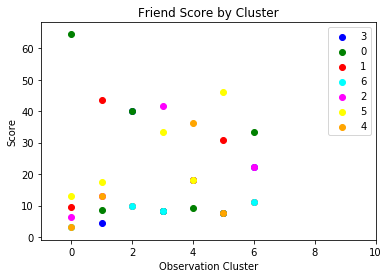

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import from_levels_and_colors
from matplotlib.collections import LineCollection

clusterPD = pd.DataFrame()
Obs_cluster = []
Friend_cluster = []
score = []

#Calculate the number of times a cluster shows up as a listed friend of each observation in another cluster
for key in counts:
    for item in counts[key]:
        if item != 'total':
            Obs_cluster.append(key)
            Friend_cluster.append(item)
            score.append(counts[key][item])

#Store results in a data frame
clusterPD['obs_cluster'] = pd.Series(Obs_cluster)  
clusterPD['Friend_cluster'] = pd.Series(Friend_cluster)
clusterPD['score'] = pd.Series(score)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple']


#Plot the score for each friend cluster against the cluster that listed it as a friend
i = 0

for clust in list(clusterPD['Friend_cluster'].drop_duplicates()):
    mask = clusterPD['Friend_cluster'] == clust
    plt.scatter(clusterPD['obs_cluster'][mask] ,clusterPD['score'][mask],c=colors[i], label = clust)
    i = i+1
    
plt.title("Friend Score by Cluster")
plt.legend(numpoints=1, loc='best')
plt.xlabel('Observation Cluster')
plt.ylabel('Score')
plt.xlim(-1,10)
plt.show()
    

Text(0.5, 1.0, 'Friend Clusters for People in Cluster 7')

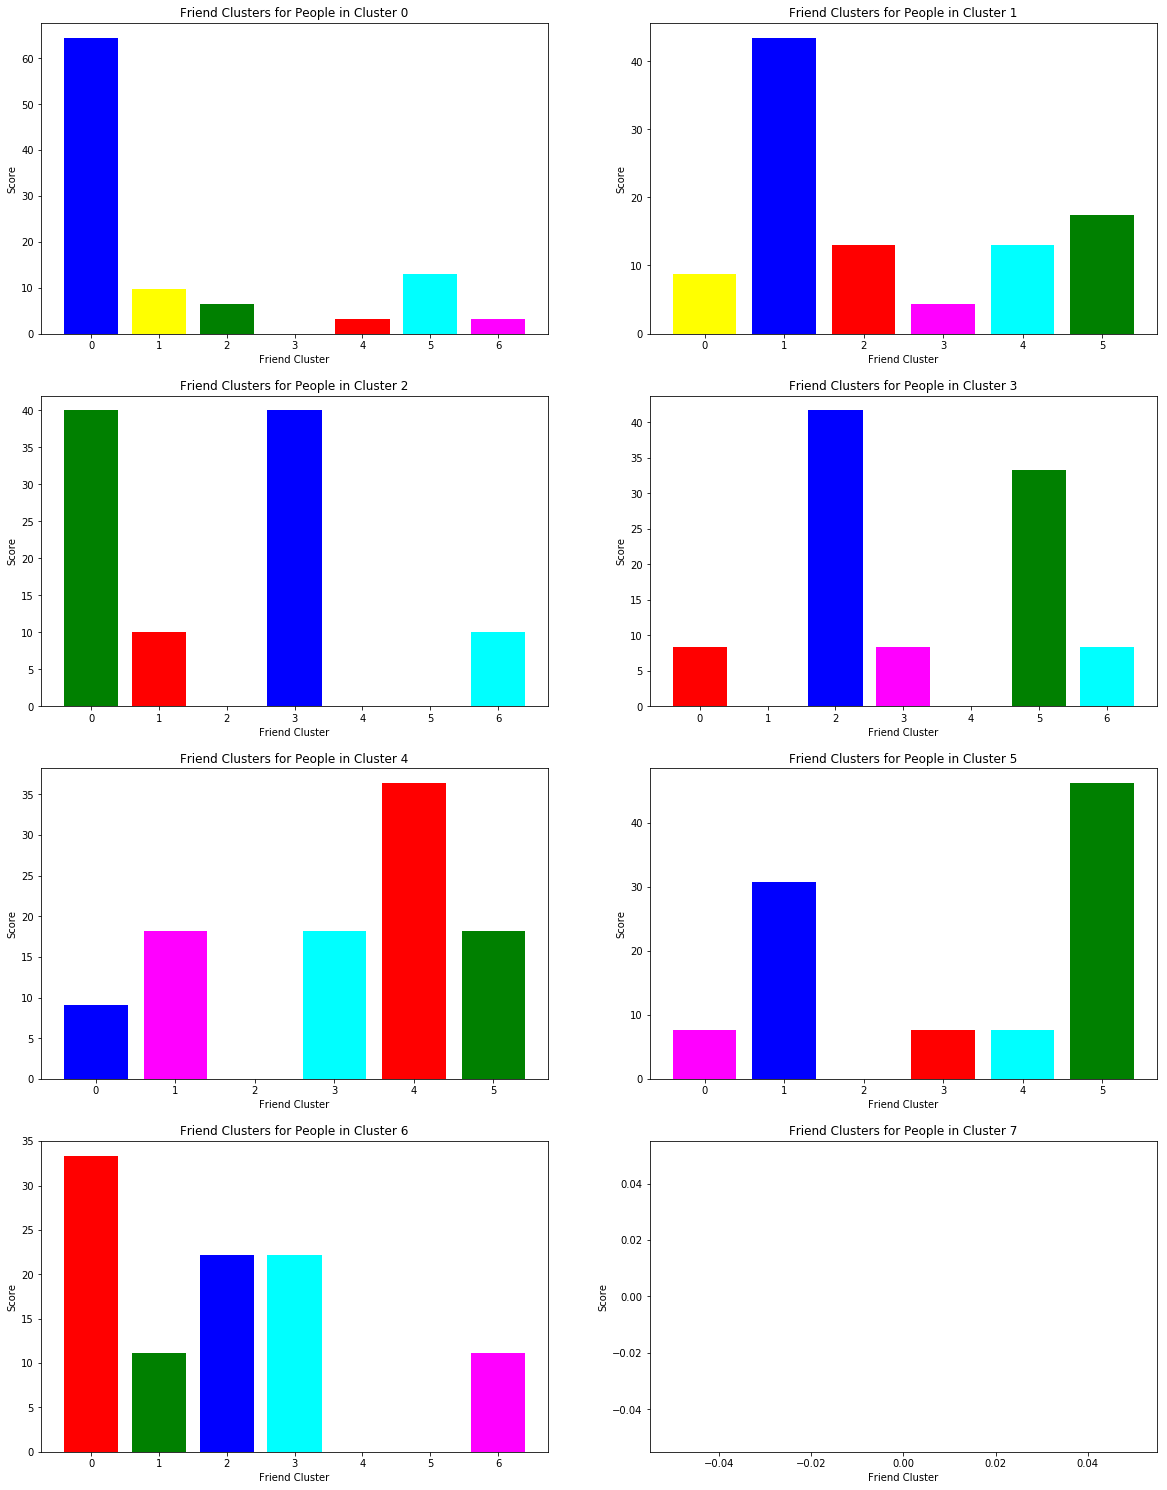

In [9]:
#Set up plots & Plot scores for each cluster
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax2 = f.add_subplot(622)
ax3 = f.add_subplot(623)
ax4 = f.add_subplot(624)
ax5 = f.add_subplot(625)
ax6 = f.add_subplot(626)
ax7 = f.add_subplot(627)
ax8 = f.add_subplot(628)

ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==0],clusterPD['score'][clusterPD['obs_cluster'] ==0], color = colors )
ax2.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==1],clusterPD['score'][clusterPD['obs_cluster'] ==1], color = colors )
ax3.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==2],clusterPD['score'][clusterPD['obs_cluster'] ==2], color = colors )
ax4.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==3],clusterPD['score'][clusterPD['obs_cluster'] ==3], color = colors )
ax5.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==4],clusterPD['score'][clusterPD['obs_cluster'] ==4], color = colors )
ax6.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==5],clusterPD['score'][clusterPD['obs_cluster'] ==5], color = colors )
ax7.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==6],clusterPD['score'][clusterPD['obs_cluster'] ==6], color = colors )
ax8.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==7],clusterPD['score'][clusterPD['obs_cluster'] ==7], color = colors )

ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 0')

ax2.set_xlabel('Friend Cluster')
ax2.set_ylabel('Score')
ax2.set_title('Friend Clusters for People in Cluster 1')

ax3.set_xlabel('Friend Cluster')
ax3.set_ylabel('Score')
ax3.set_title('Friend Clusters for People in Cluster 2')

ax4.set_xlabel('Friend Cluster')
ax4.set_ylabel('Score')
ax4.set_title('Friend Clusters for People in Cluster 3')

ax5.set_xlabel('Friend Cluster')
ax5.set_ylabel('Score')
ax5.set_title('Friend Clusters for People in Cluster 4')

ax6.set_xlabel('Friend Cluster')
ax6.set_ylabel('Score')
ax6.set_title('Friend Clusters for People in Cluster 5')

ax7.set_xlabel('Friend Cluster')
ax7.set_ylabel('Score')
ax7.set_title('Friend Clusters for People in Cluster 6')

ax8.set_xlabel('Friend Cluster')
ax8.set_ylabel('Score')
ax8.set_title('Friend Clusters for People in Cluster 7')


In [10]:
data['labels'].value_counts()

5    32
0    29
1    26
3    25
4    24
6    13
2    11
Name: labels, dtype: int64

C:\Users\emily\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\font_manager.py:1238: UserWarning: findfont: Font family ['Comic Sans M'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


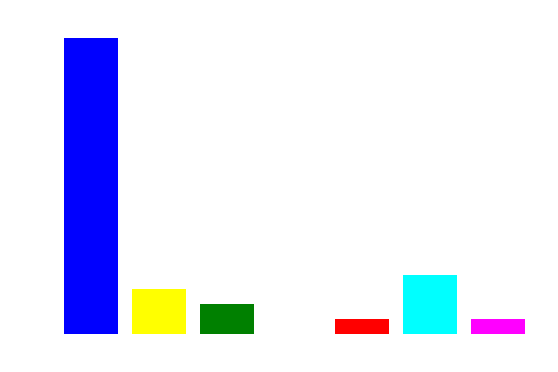

In [11]:
#Create graphs without a background for the powerpoint
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==0],clusterPD['score'][clusterPD['obs_cluster'] ==0], color = colors )

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white',labelsize=10)
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white',labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans M")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans M")
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 0', color='white')
fig1 = ax1.get_figure()
fig1.savefig('Clust0.png',transparent=True)



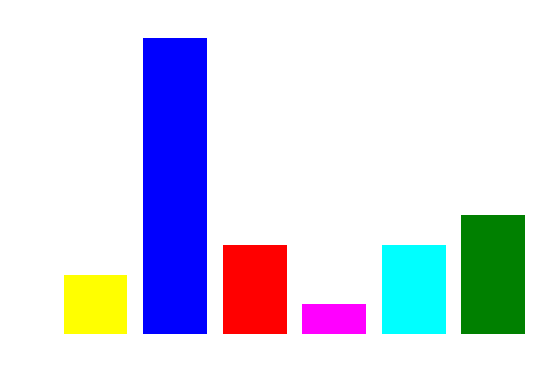

In [12]:
#Create graphs without a background for the powerpoint
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==1],clusterPD['score'][clusterPD['obs_cluster'] ==1], color = colors )
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white',labelsize=10)
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white',labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans M")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans M")
ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 1', color='white')
fig1 = ax1.get_figure()
fig1.savefig('Clust1.png',transparent=True)

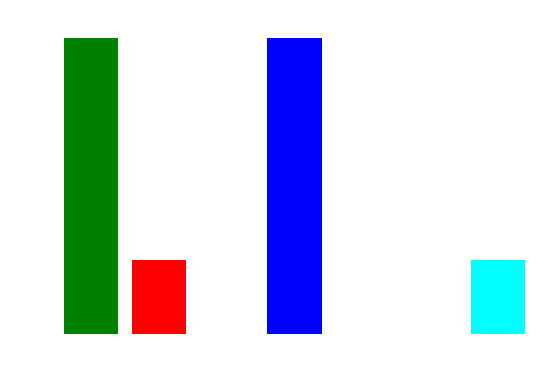

In [13]:
#Create graphs without a background for the powerpoint
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==2],clusterPD['score'][clusterPD['obs_cluster'] ==2], color = colors )
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white',labelsize=10)
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white',labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans M")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans M")
ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 2', color='white')
fig1 = ax1.get_figure()
fig1.savefig('Clust2.png',transparent=True)

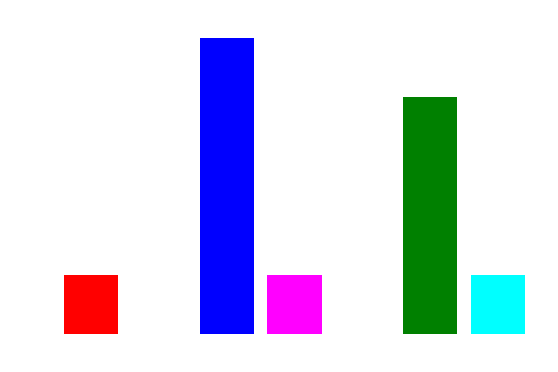

In [14]:
#Create graphs without a background for the powerpoint
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==3],clusterPD['score'][clusterPD['obs_cluster'] ==3], color = colors )

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white',labelsize=10)
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white',labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans M")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans M")
ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 3', color='white')
fig1 = ax1.get_figure()
fig1.savefig('Clust3.png',transparent=True)

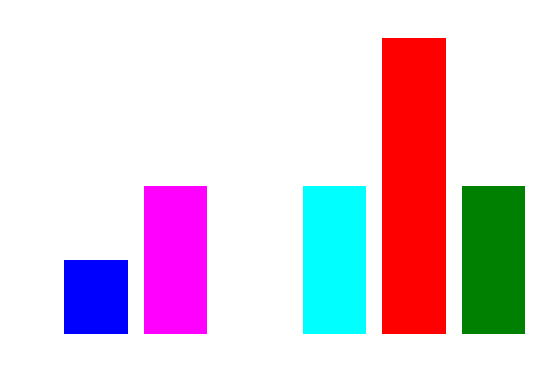

In [15]:
#Create graphs without a background for the powerpoint
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==4],clusterPD['score'][clusterPD['obs_cluster'] ==4], color = colors )
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white',labelsize=10)
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white',labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans M")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans M")
ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 4', color='white')
fig1 = ax1.get_figure()
fig1.savefig('Clust4.png',transparent=True)

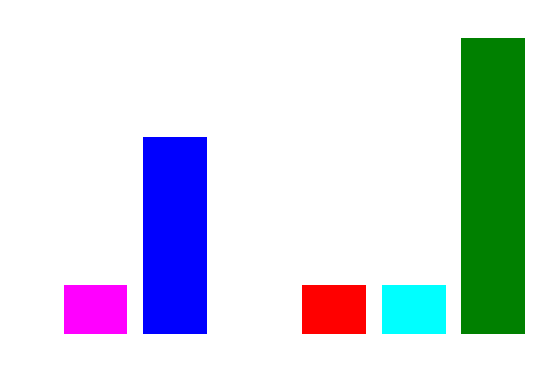

In [16]:
#Create graphs without a background for the powerpoint
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==5],clusterPD['score'][clusterPD['obs_cluster'] ==5], color = colors )
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white',labelsize=10)
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white',labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans M")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans M")
ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 5', color='white')
fig1 = ax1.get_figure()
fig1.savefig('Clust5.png',transparent=True)

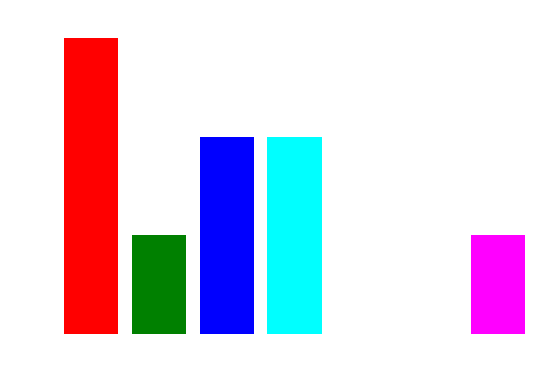

In [17]:
#Create graphs without a background for the powerpoint
f = plt.figure(figsize=(20,40))
ax1 = f.add_subplot(621)
ax1.bar(clusterPD['Friend_cluster'][clusterPD['obs_cluster'] ==6],clusterPD['score'][clusterPD['obs_cluster'] ==6], color = colors )


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white',labelsize=10)
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis='y', colors='white',labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Comic Sans M")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Comic Sans M")
ax1.set_xlabel('Friend Cluster')
ax1.set_ylabel('Score')
ax1.set_title('Friend Clusters for People in Cluster 6', color='white')
fig1 = ax1.get_figure()
fig1.savefig('Clust6.png',transparent=True)

In [18]:
#Get value counts of genders in each cluster
mask0 = (data['labels'] == 0)
mask1 = (data['labels'] == 1)
mask2 = (data['labels'] == 2)
mask3 = (data['labels'] == 3)
mask4 = (data['labels'] == 4)
mask5 = (data['labels'] == 5)
mask6 = (data['labels'] == 6)
mask7 = (data['labels'] == 7)

print('the number of females (1) and males (0) in cluster 0')
print(data.loc[mask0]['Gender_C'].value_counts())
print('the number of females (1) and males (0) in cluster 1')
print(data.loc[mask1]['Gender_C'].value_counts())
print('the number of females (1) and males (0) in cluster 2')
print(data.loc[mask2]['Gender_C'].value_counts())
print('the number of females (1) and males (0) in cluster 3')
print(data.loc[mask3]['Gender_C'].value_counts())
print('the number of females (1) and males (0) in cluster 4')
print(data.loc[mask4]['Gender_C'].value_counts())
print('the number of females (1) and males (0) in cluster 5')
print(data.loc[mask5]['Gender_C'].value_counts())
print('the number of females (1) and males (0) in cluster 6')
print(data.loc[mask6]['Gender_C'].value_counts())
print('the number of females (1) and males (0) in cluster 7')
print(data.loc[mask6]['Gender_C'].value_counts())


the number of females (1) and males (0) in cluster 0
1    22
0     6
2     1
Name: Gender_C, dtype: int64
the number of females (1) and males (0) in cluster 1
1    20
0     6
Name: Gender_C, dtype: int64
the number of females (1) and males (0) in cluster 2
0    7
1    4
Name: Gender_C, dtype: int64
the number of females (1) and males (0) in cluster 3
0    20
1     5
Name: Gender_C, dtype: int64
the number of females (1) and males (0) in cluster 4
1    19
0     5
Name: Gender_C, dtype: int64
the number of females (1) and males (0) in cluster 5
1    21
0    11
Name: Gender_C, dtype: int64
the number of females (1) and males (0) in cluster 6
0    11
1     2
Name: Gender_C, dtype: int64
the number of females (1) and males (0) in cluster 7
0    11
1     2
Name: Gender_C, dtype: int64


In [19]:
#Get value counts of race in each cluster

print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 0')
print(data.loc[mask0]['Race_C'].value_counts())
print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 1')
print(data.loc[mask1]['Race_C'].value_counts())
print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 2')
print(data.loc[mask2]['Race_C'].value_counts())
print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 3')
print(data.loc[mask3]['Race_C'].value_counts())
print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 4')
print(data.loc[mask4]['Race_C'].value_counts())
print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 5')
print(data.loc[mask5]['Race_C'].value_counts())
print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 6')
print(data.loc[mask6]['Race_C'].value_counts())
print('the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 7')
print(data.loc[mask6]['Race_C'].value_counts())

the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 0
0    14
2     6
1     6
4     3
Name: Race_C, dtype: int64
the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 1
1    20
2     3
4     1
3     1
0     1
Name: Race_C, dtype: int64
the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 2
1    5
2    4
3    1
0    1
Name: Race_C, dtype: int64
the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 3
2    15
1     5
4     2
3     2
0     1
Name: Race_C, dtype: int64
the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 4
2    19
1     3
4     1
3     1
Name: Race_C, dtype: int64
the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 5
1    17
0     8
4     3
2     3
3     1
Name: Race_C, dtype: int64
the number of asian (0), white (1), black/AA (2), other (3), Hispanic (4) in cluster 6
1    8
2    4
0  